In [5]:
import numpy as np
import math

def hurst(data):
    RS = []
    N = len(data)
    spl = 2
    min_n = 10
    # number of chunks
    # max_window = N-1
    # window_sizes = list(map(
    #     lambda x: int(10**x),
    #     np.arange(math.log10(min_n), math.log10(max_window), 0.25)))
    # window_sizes.append(N)
    # for n in window_sizes:
    m = int(np.floor(N / spl))
    for n in range(min_n, m + 1):
        # subsets
        subsets = [data[i:i + n] for i in range(0, N, n)]

        if N % n > 0:
            subsets.pop()

        set_lng = len(subsets)
        R = 0
        S = 0
        for subset in subsets:
            subset = np.array(subset)
            subset = subset[1:] - subset[:-1]
            Z = np.cumsum(subset - np.mean(subset))
            R += max(Z) - min(Z)
            S += np.std(subset)
        RS.append((R / set_lng, S / set_lng, n))

    lRS, ln = [], []
    for d in RS:
        R, S, n = d
        lRS.append(np.log(R/S))
        ln.append(np.log(n))

    H = np.polyfit(ln, lRS, 1)[0]
    return H

data = np.recfromcsv('../data/lab4_5.csv')

hurst([x[0] for x in data])


0.41940544850924516

0.38901587687822387


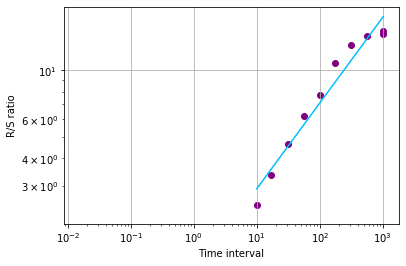

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

data = np.recfromcsv('../data/lab4_5.csv')

H, c, data = compute_Hc([x[0] for x in data], simplified=False)
print(H)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()